<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
# imports 
import spacy
from spacy.tokenizer import Tokenizer

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore


In [2]:
# read in amazon df
import pandas as pd

df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [6]:
# loading spacy for NLP Purposes 
nlp = spacy.load("en_core_web_lg")

In [7]:
# Tokenizing function for NLP 
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [8]:
# Perform the tokenization function
df['tokenized_reviews'] = df['reviews.text'].apply(get_lemmas)

In [9]:
df.head(1)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokenized_reviews
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...","[order, 3, item, bad, quality, miss, backup, s..."


In [10]:
# Setting the stage for LDA
id2word = corpora.Dictionary(df['tokenized_reviews'])

In [11]:
len(id2word.keys())

9706

In [13]:
# creating the corpus
# corpus = [id2word.doc2bow(text) for text in df['clean_keywords']]
corpus = [id2word.doc2bow(text) for text in df['tokenized_reviews']]

In [ ]:
corpus[100]

In [17]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics=20,
                   passes=35, 
                   workers=12
                  )

In [ ]:
lda.print_topics()

In [20]:
import re

words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(20)]

In [21]:
topic_labels = [', '.join(t[0:5]) for t in words]

In [ ]:
for id, t in enumerate(topic_labels): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

In [27]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [31]:
# Dope Vizualization 1...
# pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/trevorjames/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
distro = [lda[doc] for doc in corpus]

/Users/trevorjames/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
def update(doc):
    d_dist = {k:0 for k in range(0,20)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in distro] 

topics = pd.DataFrame.from_records(new_distro)
topics.columns = topic_labels

/Users/trevorjames/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
topics

/Users/trevorjames/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"""light"", ""charge"", ""Kindle"", ""read"", ""weight""","""buy"", ""tablet"", ""problem"", ""good"", ""Friday""","""tablet"", ""Amazon"", ""buy"", ""good"", ""great""","""easy"", ""use"", ""great"", ""love"", ""tablet""","""read"", ""book"", ""size"", ""easy"", ""Kindle""","""Kindle"", ""great"", ""Fire"", ""kindle"", ""love""","""year"", ""old"", ""love"", ""tablet"", ""buy""","""good"", ""product"", ""price"", ""great"", ""quality""","""battery"", ""great"", ""price"", ""work"", ""good""","""Amazon"", ""time"", ""box"", ""work"", ""order""","""game"", ""read"", ""phone"", ""watch"", ""use""","""time"", ""set"", ""control"", ""parental"", ""kid""","""device"", ""app"", ""like"", ""screen"", ""tablet""","""tablet"", ""app"", ""good"", ""Amazon"", ""kid""","""tablet"", ""great"", ""price"", ""fast"", ""Fire""","""battery"", ""use"", ""buy"", ""long"", ""Amazon""","""love"", ""buy"", ""gift"", ""Christmas"", ""tablet""","""app"", ""expect"", ""store"", ""work"", ""Amazon""","""kid"", ""great"", ""tablet"", ""child"", ""friendly""","""tablet"", ""charge"", ""$"", ""buy"", ""good"""
0,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.106463,0.0000,0.000000,0.0000,0.711716,0.000000,0.0000,0.000000,0.116323
1,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.215549,0.634445,0.0000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000
2,0.012500,0.0125,0.012500,0.0125,0.012500,0.012500,0.012500,0.012500,0.762491,0.0125,0.012500,0.012500,0.0125,0.012500,0.0125,0.012500,0.012500,0.0125,0.012500,0.012500
3,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.841666,0.0000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000
4,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.841666,0.0000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,0.000000,0.0000,0.000000,0.0000,0.189233,0.127393,0.622656,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000
28328,0.000000,0.0000,0.117719,0.0000,0.000000,0.000000,0.438551,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.348834,0.0000,0.000000,0.000000
28329,0.185681,0.0000,0.000000,0.0000,0.380855,0.000000,0.000000,0.071036,0.000000,0.0000,0.000000,0.000000,0.0000,0.189733,0.0000,0.076230,0.000000,0.0000,0.075867,0.000000
28330,0.000000,0.0000,0.361892,0.0000,0.085240,0.000000,0.000000,0.000000,0.000000,0.0000,0.286178,0.000000,0.0000,0.000000,0.0000,0.000000,0.070268,0.0000,0.000000,0.163797


In [38]:
df['primary_topic'] = topics.idxmax(axis=1)

/Users/trevorjames/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
df.head()

/Users/trevorjames/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokenized_reviews,primary_topic
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...","[order, 3, item, bad, quality, miss, backup, s...","""battery"", ""use"", ""buy"", ""long"", ""Amazon"""
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...","[bulk, expensive, way, product, like]","""battery"", ""great"", ""price"", ""work"", ""good"""
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...","[Duracell, price, happy]","""battery"", ""great"", ""price"", ""work"", ""good"""
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...","[work, brand, battery, well, price]","""battery"", ""great"", ""price"", ""work"", ""good"""
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...","[battery, long, last, price, great]","""battery"", ""great"", ""price"", ""work"", ""good"""


In [47]:
agg = pd.pivot_table(df, values=['tokenized_reviews'], 
                     index=['primary_topic'], 
                     columns=['reviews.rating'], aggfunc='count')

agg = agg.reset_index()
agg.columns = ['primary_topic', '1_star', '2_star', '3_star', '4_star', '5_star']
agg.head()

/Users/trevorjames/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,primary_topic,1_star,2_star,3_star,4_star,5_star
0,"""Amazon"", ""time"", ""box"", ""work"", ""order""",42.0,32.0,31.0,117.0,440.0
1,"""Kindle"", ""great"", ""Fire"", ""kindle"", ""love""",7.0,8.0,23.0,226.0,996.0
2,"""app"", ""expect"", ""store"", ""work"", ""Amazon""",18.0,16.0,20.0,104.0,259.0
3,"""battery"", ""great"", ""price"", ""work"", ""good""",68.0,73.0,192.0,723.0,5181.0
4,"""battery"", ""use"", ""buy"", ""long"", ""Amazon""",571.0,267.0,267.0,356.0,1406.0


/Users/trevorjames/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='1_star', ylabel='primary_topic'>

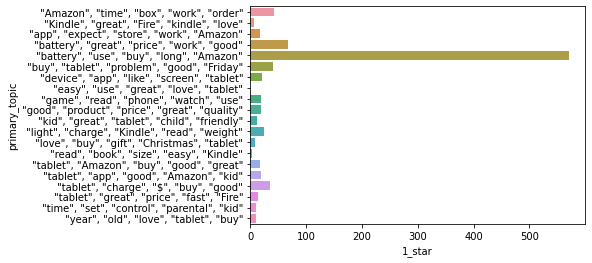

In [50]:
import seaborn as sns

sns.barplot(x='1_star', y='primary_topic', data=agg)

/Users/trevorjames/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='5_star', ylabel='primary_topic'>

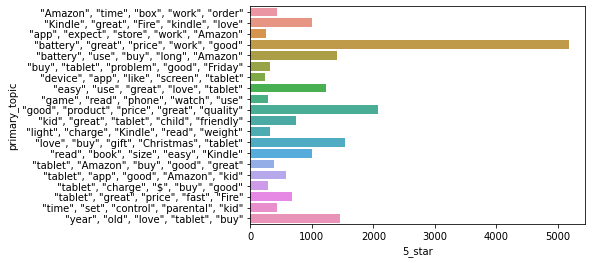

In [51]:
sns.barplot(x='5_star', y='primary_topic', data=agg)

Write a few bullets on your findings in markdown at the end

### Conclusion
After running the model through LDA, and looking at the topics:
1. It seems as though I failed to remove some stop words that were creating a set of topics that did not really explain much more than we already knew
2. CLEANING IS EVERYTHING: Something that I see from each and every assignment that taking the time to clean the data, or at least understanding how to go back and take care of things form earlier steps is very important
3. Using these topic analysis to copare to sentiment is a great way to create more insights from basic text. 

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling